<a href="https://colab.research.google.com/github/Egaw0/ProgresBelajarku/blob/main/06_ManipulasiDataRaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
pip install geopandas

In [ ]:
pip install pyproj

In [ ]:
pip install rasterio

In [ ]:
pip install earthpy

In [ ]:
pip install rioxarray

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoSeries, GeoDataFrame

In [ ]:
import rasterio as rio
import rasterio.plot as rioplot
import rioxarray as rxr
import pyproj
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask

In [ ]:
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Directory setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.chdir("drive/MyDrive/04_Lecture/2023-2024 Genap/01_Geokomputasi")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/04_Lecture/2023-2024 Genap/01_Geokomputasi'

# Akses data landsat google cloud

In [ ]:
fileB1 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B1.TIF'
fileB2 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B2.TIF'
fileB3 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B3.TIF'
fileB4 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B4.TIF'
fileB5 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B5.TIF'
fileB6 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B6.TIF'
fileB7 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B7.TIF'
fileB8 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B8.TIF'
fileB9 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/101/062/LC08_L1TP_101062_20200521_20200527_01_T1/LC08_L1TP_101062_20200521_20200527_01_T1_B9.TIF'

WV2 = "03_Raster/Data/10JAN25024728-M2AS-052647590010_01_P001.TIF"

In [ ]:
with rio.open(fileB1) as imgB1:
  rsL8b1 = imgB1.read()
  print('imgB1.profile: ', imgB1.profile)

with rio.open(fileB2) as imgB2:
  rsL8b2 = imgB2.read()
  print('imgB2.profile: ', imgB2.profile)

with rio.open(fileB3) as imgB3:
  rsL8b3 = imgB3.read()
  print('imgB2.profile: ', imgB3.profile)

with rio.open(fileB4) as imgB4:
  rsL8b4 = imgB4.read()
  print('imgB2.profile: ', imgB4.profile)

with rio.open(fileB5) as imgB5:
  rsL8b5 = imgB5.read()
  print('imgB2.profile: ', imgB5.profile)

Alternatif code untuk simplifikasi:


1.   membuat list file landsat
2.   membuat metadata dari 1 file yang akan digunakan untuk file stacking
3.   membuka dan melakukan layer stacking kemudian menyimpan file dengan nama Landsat8.tif pada directory utama
4.   memanggil ulang data tif



In [ ]:
# 1. List data landsat
fileL8 = [fileB1, fileB2, fileB3, fileB4, fileB5, fileB6, fileB7, fileB8, fileB9]

In [ ]:
# 2. Create Metadata
r = rio.open(fileL8[0])
meta = r.meta
meta.update(count = len(fileL8))
meta.update(driver = "GTiff")
print(meta)

In [ ]:
# 3. Membuka semua file kemudian menyimpannya sebagai file baru
with rio.open("Papua_Landsat8.tif", "w", **meta) as dst:
    for id, layer in enumerate(fileL8, start = 1):
        with rio.open(layer) as src:
            dst.write(src.read(1), id)

In [ ]:
with rio.open("Papua_Landsat8.tif") as imgL8:
  rsL8 = imgL8.read()
  print('imgL8.profile: ', imgL8.profile)

In [ ]:
ep.plot_bands(rsL8)

In [ ]:
ep.plot_rgb(rsL8,
            rgb=[3, 2, 1],
            title="RGB Composite Image Papua Landsat Data")

In [ ]:
with rio.open(WV2) as imgWv2:
  rsWv2 = imgWv2.read()
  print(imgWv2.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 4461, 'height': 2711, 'count': 8, 'crs': CRS.from_epsg(32750), 'transform': Affine(2.0, 0.0, 391420.0,
       0.0, -2.0, 9079256.0), 'blockysize': 117, 'tiled': False, 'interleave': 'band'}


saat melakukan printah `print(image.profile)` maka informasi meta data dapat diketahui terutama sistem proyeksinya. Selalu pahami sistem proyeksi dari data raster yang digunakan. Kesalahan paling umum dari pengolahan data raster berbasis code adalah menggunakan data raster dengan sistem koordinat yang berbeda.

In [ ]:
ep.plot_bands(rsWv2)

# Raster Data Manipulation

Terkait pengolahan data raster, penggunaan  library `rioarray` menurut saya lebih mempermudah karena file raster yang dibaca dengan library `rioarray` dapat memuat kedua informasi pixel dan metadatanya.

## Projection

In [ ]:
dst_crs = 'EPSG:32750'

In [ ]:
rsWV2 = rxr.open_rasterio(WV2, masked=True).squeeze()
rsL8  = rxr.open_rasterio("Papua_Landsat8.tif", masked=True).squeeze()

In [ ]:
rsL8 = rsL8.rio.reproject(dst_crs)
rsL8.rio.crs

CRS.from_epsg(32750)

## Croping or Cliping
Proses croping dilakukan menggunakan informasi extend dari data citra worldview-2

In [ ]:
boxs = rsWV2.rio.bounds()
print(boxs)

(391420.0, 9073834.0, 400342.0, 9079256.0)


In [ ]:
rsWV2c = rsWV2.rio.clip_box(
    minx=391420.0,
    miny=9074834.0,
    maxx=398342.0,
    maxy=9075256.0,
)

In [ ]:
#rsWV2c = rsWV2.rio.clip_box(minx=boxs[0], miny=boxs[1], maxx=boxs[2], maxy=boxs[3],)

In [ ]:
print(rsWV2c)

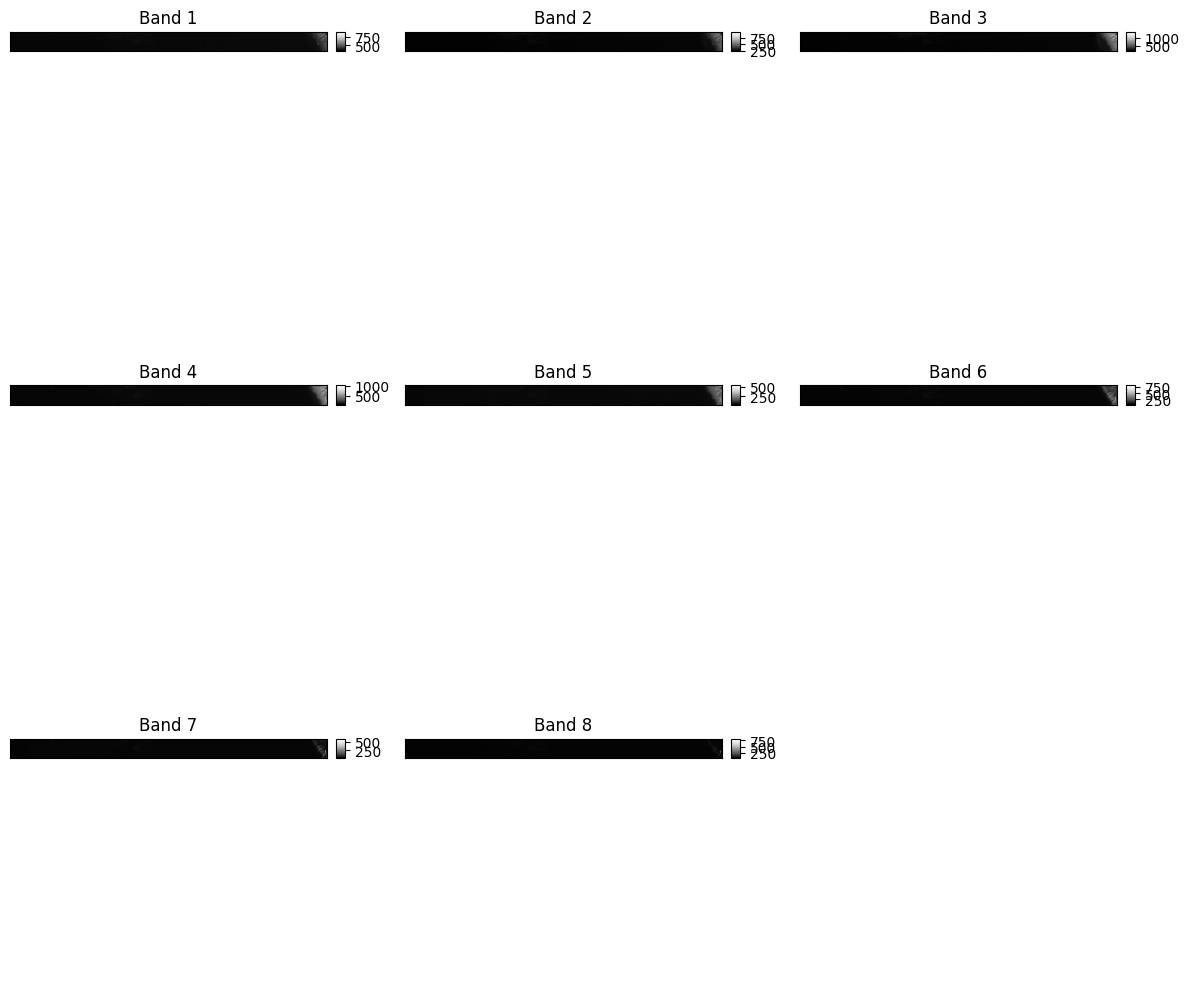

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>],
       [<Axes: title={'center': 'Band 4'}>,
        <Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>],
       [<Axes: title={'center': 'Band 7'}>,
        <Axes: title={'center': 'Band 8'}>, <Axes: >]], dtype=object)

In [ ]:
ep.plot_bands(rsWV2c)

## Masking

In [ ]:
# Buka file raster pulau gili
vctpulau = gpd.read_file("03_Raster/Data/Jayapura.shp")
print("CRS: ", vctpulau.crs)

Sistem proyeksi data vektor berbeda dengan data raster. Sehinga reprojection perlu dilakukan.

In [ ]:
vctpulau = vctpulau.to_crs(dst_crs)
print("CRS: ", vctpulau.crs)
vctpulau.plot()

In [ ]:
rsL8cm = rsL8c.rio.clip(vctpulau, crs=32750)

## Visualisasi

In [ ]:
ep.plot_bands(rsL8c)

In [ ]:
ep.plot_rgb(rsL8.values,
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Papua Landsat Data")

In [ ]:
ep.plot_rgb(rsWV2.values,
            rgb=[4, 3, 2],
            title="RGB Composite Image\n Gili Mantra WorldView2 Data")

In [ ]:
ep.plot_rgb(rsWV2.values,
            rgb=[4, 3, 2],
            title="RGB Composite Image\n Gili Mantra WorldView2 Data",
            stretch=True, str_clip=1)